In [77]:
# автокодировщик (autoencoder) для обучения без учителя (кластеринг)
import librosa
import numpy as np
import os
import tensorflow as tf
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [79]:
# 1. Загрузка и предобработка аудио данных
def load_audio_files(directory):
    audio_data = []
    for filename in os.listdir(directory):
        if filename.endswith('.wav'):  # Предполагаем, что файлы в формате .wav
            file_path = os.path.join(directory, filename)
            y, sr = librosa.load(file_path, sr=8000)  # Загрузка с частотой 8000 Гц
            audio_data.append(y)
    return audio_data

In [83]:
# Загрузка аудио
audio_directory = 'birds-for_classes'  # Путь к папке с данными
audio_files = load_audio_files(audio_directory)


In [85]:
len(audio_files)

23

In [6]:
# Преобразование аудио в MFCC
mfcc_features = [librosa.feature.mfcc(y=audio, sr=8000, n_mfcc=13).T for audio in audio_files]
mfcc_features = np.array([np.mean(mfcc, axis=0) for mfcc in mfcc_features])  # Среднее по временной оси

In [9]:
mfcc_features.shape

(23, 13)

In [11]:
mfcc_features.shape[1]

13

In [13]:
# 2. Создание автокодировщика
input_dim = mfcc_features.shape[1] # Это будет 13

In [17]:
# Определение модели автокодировщика
autoencoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),  # Вход размерности 13
    tf.keras.layers.Dense(13, activation='relu'),  # Кодировщик
    tf.keras.layers.Dense(16, activation='relu'),  # Скрытый слой
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(input_dim, activation='sigmoid')  # Декодировщик
])

autoencoder.compile(optimizer='adam', loss='mse')


In [ ]:
# 3. Обучение автокодировщика
autoencoder.fit(mfcc_features, mfcc_features, epochs=100, batch_size=2, shuffle=True, verbose=0)

In [21]:
# 4. Извлечение признаков
# Создаем модель для извлечения признаков
encoder_input = tf.keras.Input(shape=(input_dim,))
encoded = autoencoder.layers[1](encoder_input)  # Первый скрытый слой
encoded = autoencoder.layers[2](encoded)  # Второй скрытый слой (кодировщик)
encoder = tf.keras.Model(inputs=encoder_input, outputs=encoded)

In [23]:
# Теперь вызываем модель на входных данных
encoded_features = encoder.predict(mfcc_features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


In [25]:
# 5. Кластеризация с использованием K-means
kmeans = KMeans(n_clusters=4)  # Укажите количество кластеров
kmeans.fit(encoded_features)
labels = kmeans.labels_

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


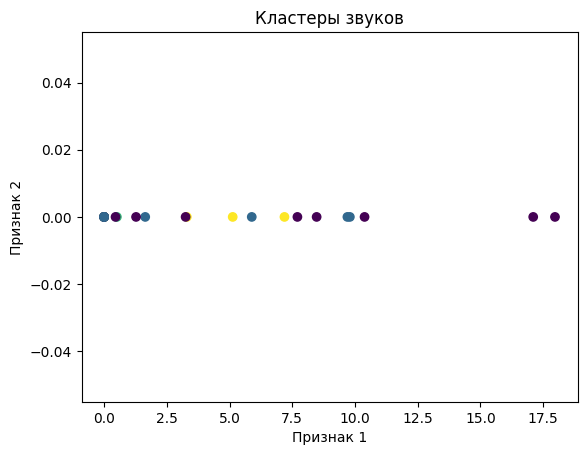

In [27]:
# Визуализация кластеров (если нужно)
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=labels)
plt.title('Кластеры звуков')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

In [29]:
print("Labels:", labels)

Labels: [0 1 3 3 3 1 1 2 2 2 0 2 0 0 0 0 0 0 0 0 1 1 1]


In [65]:
all_files = os.listdir(audio_directory)
print("Все файлы в директории:", all_files)

Все файлы в директории: ['1.wav', '10.wav', '11.wav', '12.wav', '13.wav', '14.wav', '15.wav', '17.wav', '18.wav', '19.wav', '2.wav', '20.wav', '21.wav', '22.wav', '23.wav', '24.wav', '3.wav', '4.wav', '5.wav', '6.wav', '7.wav', '8.wav', '9.wav']


In [97]:
# Предположим, что у вас есть следующие переменные:
# file_paths - список с путями к аудиофайлам
# labels - список с номерами кластеров


# Создаем DataFrame
data = {
    'Audio File': [os.path.basename(file) for file in all_files],  # Извлекаем только имена файлов
    'Cluster': labels  # Номера кластеров
}

df = pd.DataFrame(data)

# Выводим DataFrame
print(df)

   Audio File  Cluster
0       1.wav        0
1      10.wav        1
2      11.wav        3
3      12.wav        3
4      13.wav        3
5      14.wav        1
6      15.wav        1
7      17.wav        2
8      18.wav        2
9      19.wav        2
10      2.wav        0
11     20.wav        2
12     21.wav        0
13     22.wav        0
14     23.wav        0
15     24.wav        0
16      3.wav        0
17      4.wav        0
18      5.wav        0
19      6.wav        0
20      7.wav        1
21      8.wav        1
22      9.wav        1
